In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, mannwhitneyu
sns.set(style='ticks', context='paper')
%matplotlib inline

In [41]:
df = pd.read_csv("peak_flow.csv")

In [42]:
date_fields = ["hour", "day", "month", "year"]
dates = pd.to_datetime(df[date_fields])
df.index = dates
df = df.drop(date_fields, axis=1)

In [43]:
pre = ["pre1", "pre2", "pre3"]
post = ["post1", "post2", "post3"]

In [44]:
def timeseries(ax):
    df["diff"] = df[post].mean(axis=1) - df[pre].mean(axis=1)
    ax.plot(df[post].mean(axis=1), label="post-medication mean and range")
    ax.plot(df[pre].mean(axis=1), label="pre-medication mean and range")
    ax.fill_between(df.index, df[post].max(axis=1), df[post].min(axis=1), alpha=0.1)
    ax.fill_between(df.index, df[pre].max(axis=1), df[pre].min(axis=1), alpha=0.1)
    plt.draw()
    xlabels = [i.get_text().split("-") for i in ax.get_xticklabels()]
    xlabels = [f"{i[2]}/{i[1]}" for i in xlabels]
    
    ax5 = ax.twinx()
    ax5.bar(df.index, df["diff"], color=sns.color_palette()[2], alpha=0.5, width=0.2)
    ax5.set_ylabel("Difference (l/min)", color=sns.color_palette()[2])
    ax5.tick_params('y', colors=sns.color_palette()[2])
    ax5.set_ylim(0,500)
    ax5.set_yticks([0,100])
    ax.set_xticklabels(xlabels)
    ax.set_xlabel("Time (days)")
    ax.set_ylabel("Peak flow (l/min)")
    ax.legend(loc='upper left')
    return ax

In [45]:
def regression(ax):
    x = df[pre].mean(axis=1)
    y = df[post].mean(axis=1)
    p = sns.regplot(x, y, ci=None, ax=ax, color=sns.color_palette()[2])
    slope, intercept, r_value, p_value, std_err = linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
    ax.set_xlabel("Mean pre-medication peak flow (l/min)")
    ax.set_ylabel("Mean post-medication peak flow (l/min)")
    ax.text(x.min(), 0.97 * y.max(), f"$y$ = {slope:.3f}$x$ + {int(intercept)}\n $r^2$ = {r_value ** 2:.3f}")
    return ax

In [48]:
def hist(ax):
    posty = df[post].values.ravel()
    prey = df[pre].values.ravel()
    ax.hist(posty, label="post-medication", alpha=0.5, color=sns.color_palette()[0])
    ax.hist(prey, label="pre-medication", alpha=0.5, color=sns.color_palette()[1])
    ax.set_xlabel("Peak flow (l/min)")
    ax.set_ylabel("Frequency")
    p = mannwhitneyu(posty, prey, alternative='greater')[1]
    ax.text(520, 20, f"Mann-Whitney p-value = {p:.2e}")
    ax.legend()
    return ax

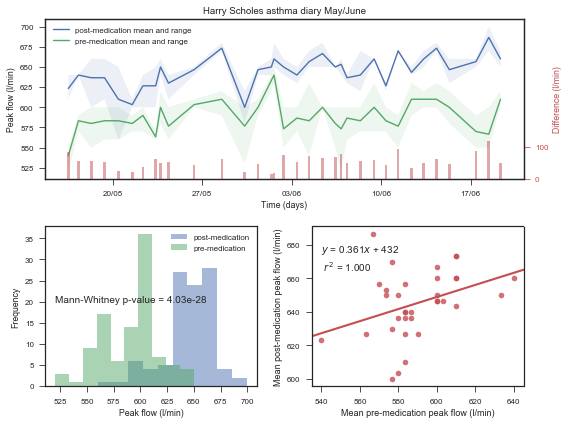

In [51]:
fig, a = plt.subplots(2, 2, figsize=(8, 6))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
ax1.set_title("Harry Scholes asthma diary May/June")
#ax2.set_ylim(0,20)
timeseries(ax1)
hist(ax2)
regression(ax3)
plt.tight_layout()
plt.savefig("peak_flow.pdf")